In [230]:
# Nhà hàng Chipotle cần phân tích dữ liệu bán được trong ngày diễn ra khuyến mãi để có thể điều chỉnh thực đơn và thực hiện các chương trình khuyến mãi phù hợp.
# 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

# Dữ liệu được cung cấp trong file chipotle.tsv, hãy thực hiện các yêu cầu sau trong file đính kèm:
# 1.	Đọc dữ liệu và gán vào biến chipo. Hiển thị 10 dòng đầu của dữ liệu.
# 2.	Tạo biến x chứa các item_name là các món ăn được khách hàng gọi , in head của x
#         Tạo một dictionary với 2 thông tin: tên món ăn (item_name) và tần suất/số lần gọi món (gợi ý: sử dụng collections.Counter(x)), in kết quả
# 3.	Chuyển dictionary câu 2 thành DataFrame df để chuẩn bị cho các yêu cầu phân tích sau đó
# 4.	a) Sắp xếp df theo tần suất giảm dần, và lấy 5 item đầu tiên
#         b) Vẽ biểu đồ bar chart cho biết 5 món được gọi nhiều nhất (có title, xlabel, ylabel và xsticks)
# 5.	a) Đổi kiểu dữ liệu của cột item_price sang kiểu số thực
#         b) Nhóm các đơn hàng theo order_id, và tính tổng số lượng gọi và tổng giá trị của mỗi đơn hàng, in kết quả
# 6.	Từ câu 5b, hãy vẽ scatterplot với x là item_price, và y là quantity, có title, xlabel, ylabel.
#         Bạn có nhận xét gì qua biểu đồ này ?

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [232]:
# 1.	Đọc dữ liệu và gán vào biến chipo. Hiển thị 10 dòng đầu của dữ liệu.
path = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(path, sep = '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [233]:
# 2.	Tạo biến x chứa các item_name là các món ăn được khách hàng gọi , in head của x
x = chipo['item_name']
#         Tạo một dictionary với 2 thông tin: tên món ăn (item_name) và tần suất/số lần gọi món (gợi ý: sử dụng collections.Counter(x)), in kết quả
dict_item = Counter(x)
dict_item.most_common(10)

[('Chicken Bowl', 726),
 ('Chicken Burrito', 553),
 ('Chips and Guacamole', 479),
 ('Steak Burrito', 368),
 ('Canned Soft Drink', 301),
 ('Chips', 211),
 ('Steak Bowl', 211),
 ('Bottled Water', 162),
 ('Chicken Soft Tacos', 115),
 ('Chips and Fresh Tomato Salsa', 110)]

In [234]:
# 3.	Chuyển dictionary câu 2 thành DataFrame df để chuẩn bị cho các yêu cầu phân tích sau đó
df_item = pd.DataFrame.from_dict(dict_item, orient='index', columns=['Counter'])
df_item.head()

,Counter
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726


In [235]:
# 4.	a) Sắp xếp df theo tần suất giảm dần, và lấy 5 item đầu tiên
#         b) Vẽ biểu đồ bar chart cho biết 5 món được gọi nhiều nhất (có title, xlabel, ylabel và xsticks)

df_draw = df_item.sort_values('Counter', ascending=False).head()
df_draw

,Counter
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


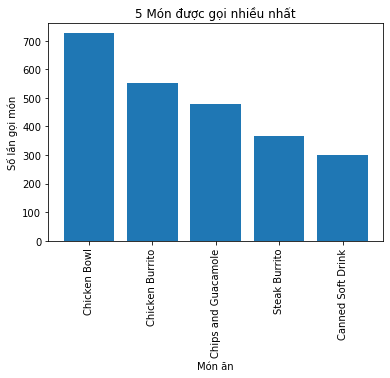

In [236]:
plt.bar(df_draw.index,df_draw['Counter'])

plt.title('5 Món được gọi nhiều nhất')
plt.xlabel('Món ăn')
plt.ylabel('Số lần gọi món')
plt.xticks(rotation=90)

plt.show()

In [237]:
# 5.	a) Đổi kiểu dữ liệu của cột item_price sang kiểu số thực
#         b) Nhóm các đơn hàng theo order_id, và tính tổng số lượng gọi và tổng giá trị của mỗi đơn hàng,
chipo['item_price_float'] = chipo['item_price'].apply(lambda x: float(x.split('$')[1]))
chipo['total_price'] = chipo['item_price_float'] * chipo['quantity']
chipo_draw = chipo.groupby('order_id').sum()[['quantity','total_price']]
chipo_draw.head()

,quantity,total_price
order_id,,
1,4,11.56
2,2,33.96
3,2,12.67
4,2,21.00
5,2,13.70


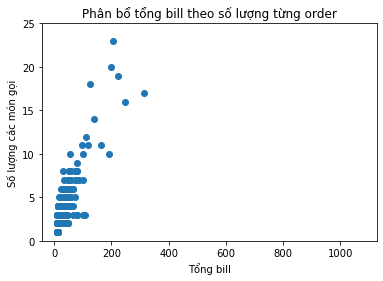

In [238]:
# 6.	Từ câu 5b, hãy vẽ scatterplot với x là item_price, và y là quantity, có title, xlabel, ylabel.
#         Bạn có nhận xét gì qua biểu đồ này ?

plt.scatter(chipo_draw['total_price'], chipo_draw['quantity'])

plt.xlabel('Tổng bill')
plt.ylabel('Số lượng các món gọi')
plt.title("Phân bổ tổng bill theo số lượng từng order")
plt.ylim(0,25)

plt.show()